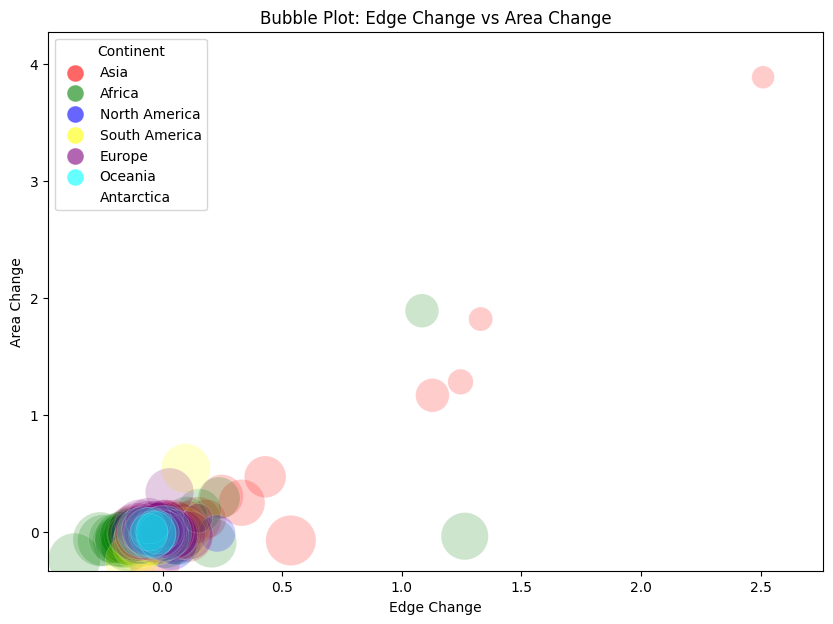

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import cartopy.crs as crs
import numpy as np

# 1. 读取CSV数据
df = pd.read_csv(r'G:\Hangkai\Forest_edge\country_stats\final_data\processed_country_data_with_area.csv')

# 2. 使用cartopy查找每个国家所在的大陆
shapefile = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shapefile)

countries = [country.attributes['NAME'] for country in reader.records()]
continents = [country.attributes['CONTINENT'] for country in reader.records()]
country_to_continent = dict(zip(countries, continents))

# 将大陆信息添加到DataFrame中
df['continent'] = df['country'].map(country_to_continent)

# 3. 给每个大陆设置不同的颜色
colors = {
    'Asia': 'red',
    'Africa': 'green',
    'North America': 'blue',
    'South America': 'yellow',
    'Europe': 'purple',
    'Oceania': 'cyan',
    'Antarctica': 'white'
}

# 4. 使用matplotlib来绘制气泡图
fig, ax = plt.subplots(figsize=(10, 7))

for continent, color in colors.items():
    subset = df[df['continent'] == continent]
    ax.scatter(subset['Edge Change'], subset['Area Change'], s=np.log(subset['forest edge 2000'])*100, color=color, alpha=0.2, edgecolors="w", linewidth=0.5)
    ax.scatter([], [], s=150, color=color, label=continent, alpha=0.6, edgecolors="w", linewidth=0.5)  # 这一行是为了在图例中给每个大陆设置统一大小的标记

ax.set_xlabel('Edge Change')
ax.set_ylabel('Area Change')

# 调整x和y轴的范围
ax.set_xlim(df['Edge Change'].min() * 1.3, df['Edge Change'].max() * 1.1)
ax.set_ylim(df['Area Change'].min() * 1.3, df['Area Change'].max() * 1.1)

ax.legend(title='Continent', scatterpoints=1)  # scatterpoints=1 使得图例中每个大陆只有一个标记点
ax.set_title('Bubble Plot: Edge Change vs Area Change')
plt.show()


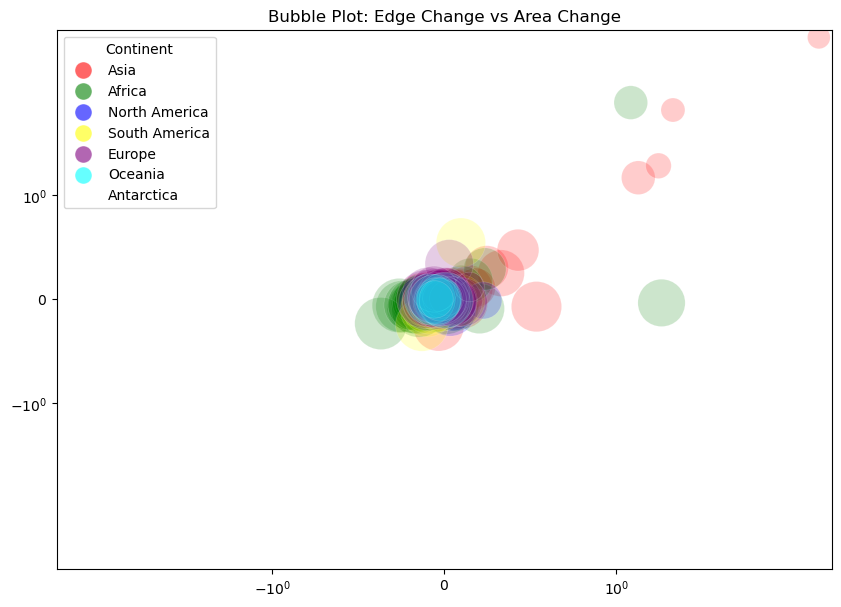

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import cartopy.crs as crs
import numpy as np

# 1. 读取CSV数据
df = pd.read_csv(r'G:\Hangkai\Forest_edge\country_stats\final_data\processed_country_data_with_area.csv')

# 2. 使用cartopy查找每个国家所在的大陆
shapefile = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shapefile)

countries = [country.attributes['NAME'] for country in reader.records()]
continents = [country.attributes['CONTINENT'] for country in reader.records()]
country_to_continent = dict(zip(countries, continents))

# 将大陆信息添加到DataFrame中
df['continent'] = df['country'].map(country_to_continent)

# 3. 给每个大陆设置不同的颜色
colors = {
    'Asia': 'red',
    'Africa': 'green',
    'North America': 'blue',
    'South America': 'yellow',
    'Europe': 'purple',
    'Oceania': 'cyan',
    'Antarctica': 'white'
}

# 4. 使用matplotlib来绘制气泡图
fig, ax = plt.subplots(figsize=(10, 7))

for continent, color in colors.items():
    subset = df[df['continent'] == continent]
    ax.scatter(subset['Edge Change'], subset['Area Change'], s=np.log(subset['forest edge 2000'])*100, color=color, alpha=0.2, edgecolors="w", linewidth=0.5)
    ax.scatter([], [], s=150, color=color, label=continent, alpha=0.6, edgecolors="w", linewidth=0.5)  # 这一行是为了在图例中给每个大陆设置统一大小的标记

# 使用对数坐标轴
ax.set_xscale('symlog')
ax.set_yscale('symlog')

# 调整x和y轴的范围
edge_change_abs_max = max(abs(df['Edge Change'].min()), abs(df['Edge Change'].max()))
area_change_abs_max = max(abs(df['Area Change'].min()), abs(df['Area Change'].max()))

ax.set_xlim(-edge_change_abs_max * 1.1, edge_change_abs_max * 1.1)
ax.set_ylim(-area_change_abs_max * 1.1, area_change_abs_max * 1.1)

ax.legend(title='Continent', scatterpoints=1)
ax.set_title('Bubble Plot: Edge Change vs Area Change')
plt.show()


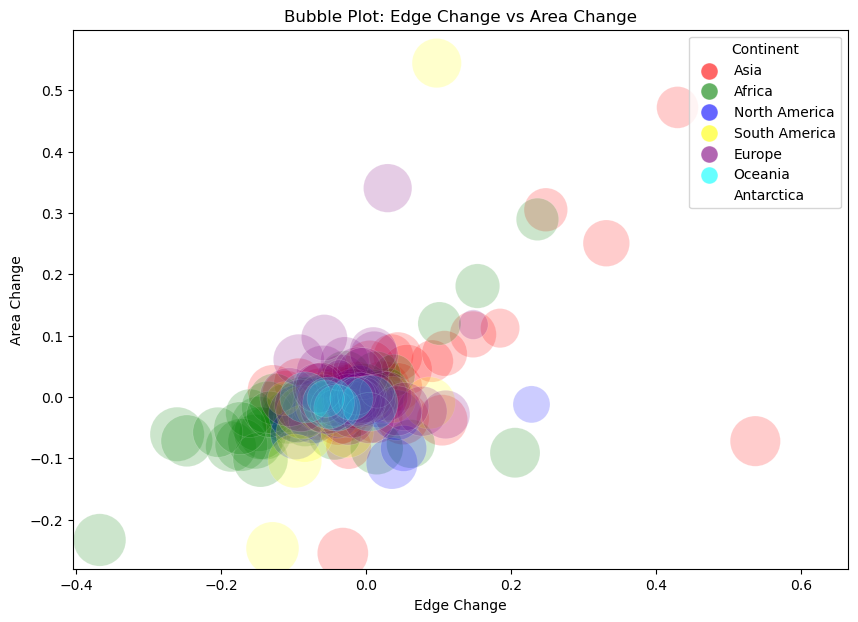

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import cartopy.crs as crs
import numpy as np

# 1. 读取CSV数据
df = pd.read_csv(r'G:\Hangkai\Forest_edge\country_stats\final_data\processed_country_data_with_area.csv')

# 2. 使用cartopy查找每个国家所在的大陆
shapefile = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shapefile)

countries = [country.attributes['NAME'] for country in reader.records()]
continents = [country.attributes['CONTINENT'] for country in reader.records()]
country_to_continent = dict(zip(countries, continents))

# 将大陆信息添加到DataFrame中
df['continent'] = df['country'].map(country_to_continent)

# 3. 给每个大陆设置不同的颜色
colors = {
    'Asia': 'red',
    'Africa': 'green',
    'North America': 'blue',
    'South America': 'yellow',
    'Europe': 'purple',
    'Oceania': 'cyan',
    'Antarctica': 'white'
}

# 4. 使用matplotlib来绘制气泡图

# 确保'Edge Change'和'Area Change'列中的所有值都是浮点数
df['Edge Change'] = df['Edge Change'].astype(float)
df['Area Change'] = df['Area Change'].astype(float)

# 丢弃包含NaN值的行
df = df.dropna(subset=['Edge Change', 'Area Change'])

# 定义阈值为3倍标准差
edge_change_threshold = 3 * df['Edge Change'].std()
area_change_threshold = 3 * df['Area Change'].std()

# 仅选择在阈值范围内的数据点
subset_df = df[
    (abs(df['Edge Change']) <= edge_change_threshold)
    & (abs(df['Area Change']) <= area_change_threshold)
]

fig, ax = plt.subplots(figsize=(10, 7))

for continent, color in colors.items():
    subset = subset_df[subset_df['continent'] == continent]
    ax.scatter(subset['Edge Change'], subset['Area Change'], s=np.log(subset['forest edge 2000'])*100, color=color, alpha=0.2, edgecolors="w", linewidth=0.5)
    ax.scatter([], [], s=150, color=color, label=continent, alpha=0.6, edgecolors="w", linewidth=0.5) 

ax.set_xlabel('Edge Change')
ax.set_ylabel('Area Change')

# 调整x和y轴的范围
ax.set_xlim(subset_df['Edge Change'].min() * 1.1, subset_df['Edge Change'].max() * 1.1)
ax.set_ylim(subset_df['Area Change'].min() * 1.1, subset_df['Area Change'].max() * 1.1)

ax.legend(title='Continent', scatterpoints=1)
ax.set_title('Bubble Plot: Edge Change vs Area Change')
plt.show()

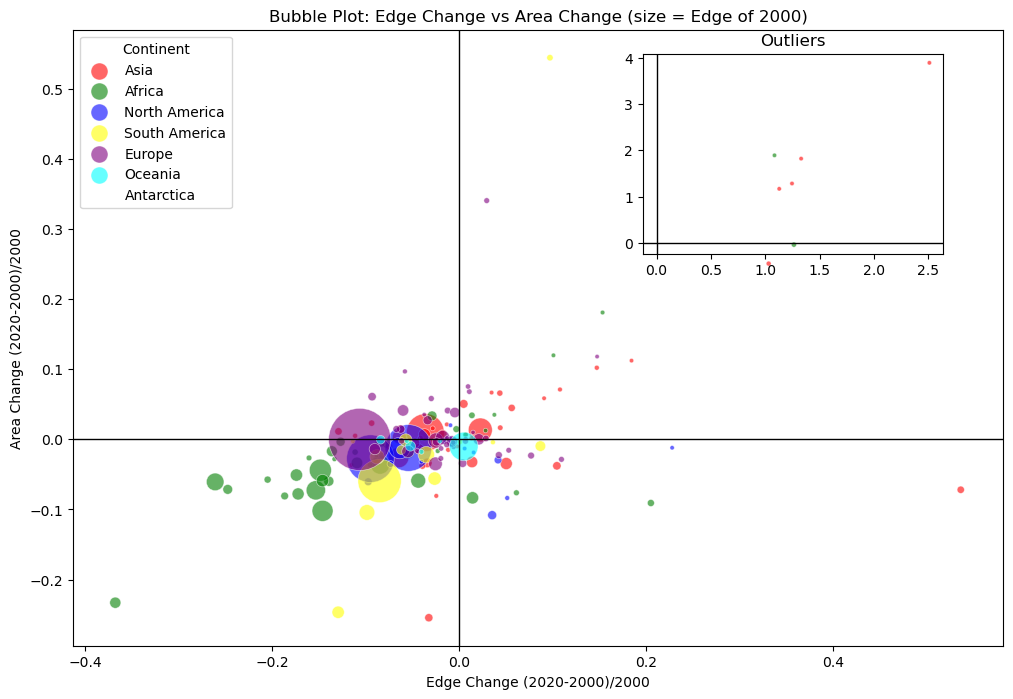

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import cartopy.crs as crs
import numpy as np

# 1. 读取CSV数据
df = pd.read_csv(r'G:\Hangkai\Forest_edge\country_stats\final_data\processed_country_data_with_area.csv')

# 2. 使用cartopy查找每个国家所在的大陆
shapefile = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shapefile)

countries = [country.attributes['NAME'] for country in reader.records()]
continents = [country.attributes['CONTINENT'] for country in reader.records()]
country_to_continent = dict(zip(countries, continents))

# 将大陆信息添加到DataFrame中
df['continent'] = df['country'].map(country_to_continent)

# 3. 给每个大陆设置不同的颜色
colors = {
    'Asia': 'red',
    'Africa': 'green',
    'North America': 'blue',
    'South America': 'yellow',
    'Europe': 'purple',
    'Oceania': 'cyan',
    'Antarctica': 'white'
}

# 4. 使用matplotlib来绘制气泡图

# 确保'Edge Change'和'Area Change'列中的所有值都是浮点数
df['Edge Change'] = df['Edge Change'].astype(float)
df['Area Change'] = df['Area Change'].astype(float)

# 丢弃包含NaN值的行
df = df.dropna(subset=['Edge Change', 'Area Change'])

# 定义阈值为3倍标准差
edge_change_threshold = 3 * df['Edge Change'].std()
area_change_threshold = 3 * df['Area Change'].std()

# 仅选择在阈值范围内的数据点
subset_df = df[
    (abs(df['Edge Change']) <= edge_change_threshold)
    & (abs(df['Area Change']) <= area_change_threshold)
]

fig, main_ax = plt.subplots(figsize=(12, 8))


# 设定期望的气泡尺寸范围
min_size = 10
max_size = 2000

# 获取数据的最小和最大值
min_area = df['forest edge 2000'].min()
max_area = df['forest edge 2000'].max()

# 计算映射后的尺寸
bubble_sizes = ((df['forest edge 2000'] - min_area) / (max_area - min_area) * (max_size - min_size) + min_size)

# 主图：显示大部分数据
for continent, color in colors.items():
    subset = subset_df[subset_df['continent'] == continent]
    subset_bubble_sizes = bubble_sizes[subset.index] # 选择正确的子集尺寸
    main_ax.scatter(subset['Edge Change'], subset['Area Change'], s=subset_bubble_sizes, color=color, alpha=0.6, edgecolors="w", linewidth=0.5)
    main_ax.scatter([], [], s=150, color=color, label=continent, alpha=0.6, edgecolors="w", linewidth=0.5)
    
main_ax.set_xlabel('Edge Change (2020-2000)/2000')
main_ax.set_ylabel('Area Change (2020-2000)/2000')
main_ax.legend(title='Continent', scatterpoints=1)
main_ax.set_title('Bubble Plot: Edge Change vs Area Change (size = Edge of 2000)')
main_ax.axvline(0, color='black', linestyle='-', linewidth=1)  # x=0 line
main_ax.axhline(0, color='black', linestyle='-', linewidth=1)  # y=0 line

# 插图：显示异常值
left, bottom, width, height = [0.6, 0.6, 0.25, 0.25]  # 可根据需要调整插图的位置和大小
inset_ax = fig.add_axes([left, bottom, width, height])

for continent, color in colors.items():
    outliers = df[
        (abs(df['Edge Change']) > edge_change_threshold)
        | (abs(df['Area Change']) > area_change_threshold)
    ]
    subset = outliers[outliers['continent'] == continent]
    subset_bubble_sizes = bubble_sizes[subset.index] # 选择正确的子集尺寸
    inset_ax.scatter(subset['Edge Change'], subset['Area Change'], s=subset_bubble_sizes, color=color, alpha=0.6, edgecolors="w", linewidth=0.5)
    
inset_ax.set_title('Outliers')
inset_ax.axvline(0, color='black', linestyle='-', linewidth=1)  # x=0 line
inset_ax.axhline(0, color='black', linestyle='-', linewidth=1)  # y=0 line

plt.show()

Function for 2000: Area = 0.02 * Edge^1.12
Function for 2020: Area = 0.02 * Edge^1.12


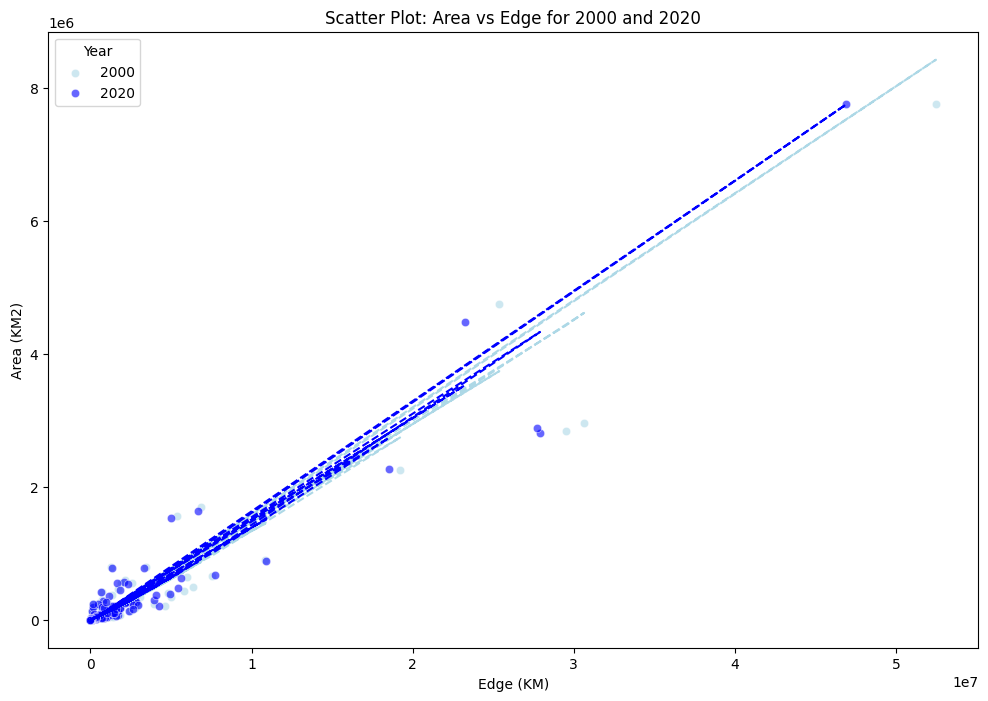

In [41]:
import matplotlib.pyplot as plt

# Assuming df has columns 'Edge 2000', 'Edge 2020', 'Area 2000', 'Area 2020'

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot for the year 2000, using a light color (e.g., lightblue)
ax.scatter(df['forest edge 2000'], df['Total Forest Area 2000'], color='lightblue', label='2000', alpha=0.6, edgecolors='w', linewidth=0.5)

# Scatter plot for the year 2020, using a deeper color (e.g., blue)
ax.scatter(df['forest edge 2020'], df['Total Forest Area 2020'], color='blue', label='2020', alpha=0.6, edgecolors='w', linewidth=0.5)

# Labeling and titling
ax.set_xlabel('Edge (KM)')
ax.set_ylabel('Area (KM2)')
ax.set_title('Scatter Plot: Area vs Edge for 2000 and 2020')
ax.legend(title='Year', scatterpoints=1)

# Setting the axes to logarithmic scale
#ax.set_xscale('log')
#ax.set_yscale('log')

# Fitting a linear line for 2000 data
coeffs_2000 = np.polyfit(np.log(df['forest edge 2000']), np.log(df['Total Forest Area 2000']), 1)
ax.plot(df['forest edge 2000'], np.exp(coeffs_2000[1]) * df['forest edge 2000'] ** coeffs_2000[0], color='lightblue', linestyle='--')

# Fitting a linear line for 2020 data
coeffs_2020 = np.polyfit(np.log(df['forest edge 2020']), np.log(df['Total Forest Area 2020']), 1)
ax.plot(df['forest edge 2020'], np.exp(coeffs_2020[1]) * df['forest edge 2020'] ** coeffs_2020[0], color='blue', linestyle='--')

# Calculate coefficients for 2000 and 2020
coeffs_2000 = np.polyfit(np.log(df['forest edge 2000']), np.log(df['Total Forest Area 2000']), 1)
coeffs_2020 = np.polyfit(np.log(df['forest edge 2020']), np.log(df['Total Forest Area 2020']), 1)

# Transform coefficients to power-law form
a_2000 = np.exp(coeffs_2000[1])
b_2000 = coeffs_2000[0]
a_2020 = np.exp(coeffs_2020[1])
b_2020 = coeffs_2020[0]

# Print the functions
print(f"Function for 2000: Area = {a_2000:.2f} * Edge^{b_2000:.2f}")
print(f"Function for 2020: Area = {a_2020:.2f} * Edge^{b_2020:.2f}")

# Show the plot
plt.show()

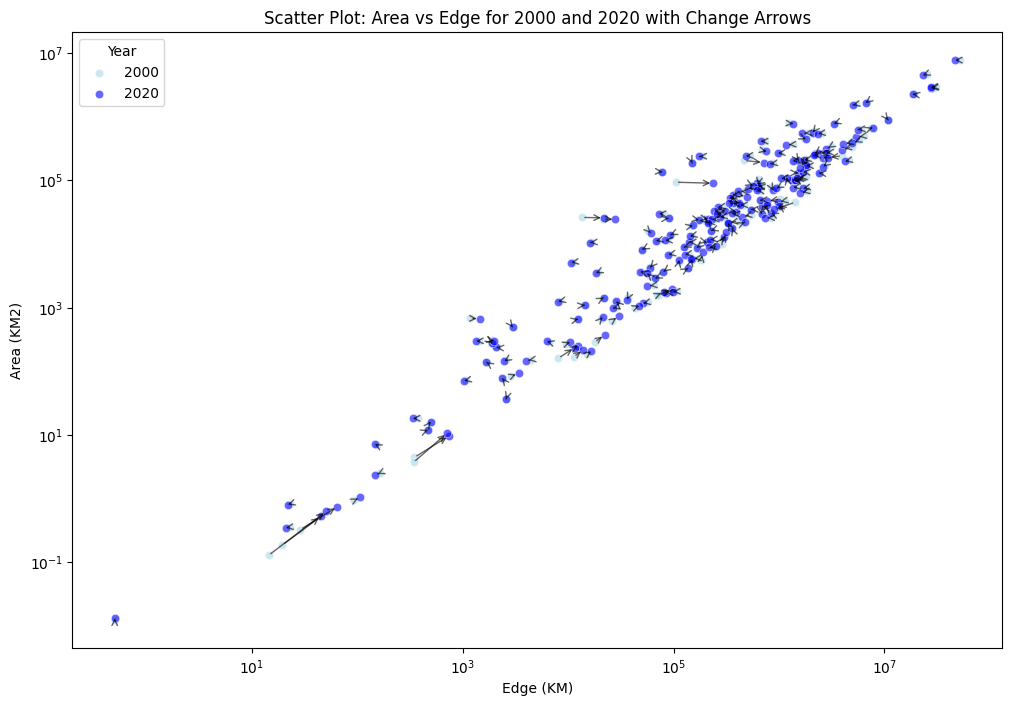

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df has columns 'Edge 2000', 'Edge 2020', 'Area 2000', 'Area 2020'

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot for the year 2000, using a light color (e.g., lightblue)
ax.scatter(df['forest edge 2000'], df['Total Forest Area 2000'], color='lightblue', label='2000', alpha=0.6, edgecolors='w', linewidth=0.5)

# Scatter plot for the year 2020, using a deeper color (e.g., blue)
ax.scatter(df['forest edge 2020'], df['Total Forest Area 2020'], color='blue', label='2020', alpha=0.6, edgecolors='w', linewidth=0.5)

# Drawing arrows from 2000 to 2020 for each country
for index, row in df.iterrows():
    ax.annotate("",
                xy=(row['forest edge 2020'], row['Total Forest Area 2020']), 
                xytext=(row['forest edge 2000'], row['Total Forest Area 2000']),
                arrowprops=dict(arrowstyle="->", lw=1, alpha = 0.6),
                annotation_clip=False)

# Setting the axes to logarithmic scale
ax.set_xscale('log')
ax.set_yscale('log')

# Labeling and titling
ax.set_xlabel('Edge (KM)')
ax.set_ylabel('Area (KM2)')
ax.set_title('Scatter Plot: Area vs Edge for 2000 and 2020 with Change Arrows')
ax.legend(title='Year', scatterpoints=1)

# Show the plot
plt.show()

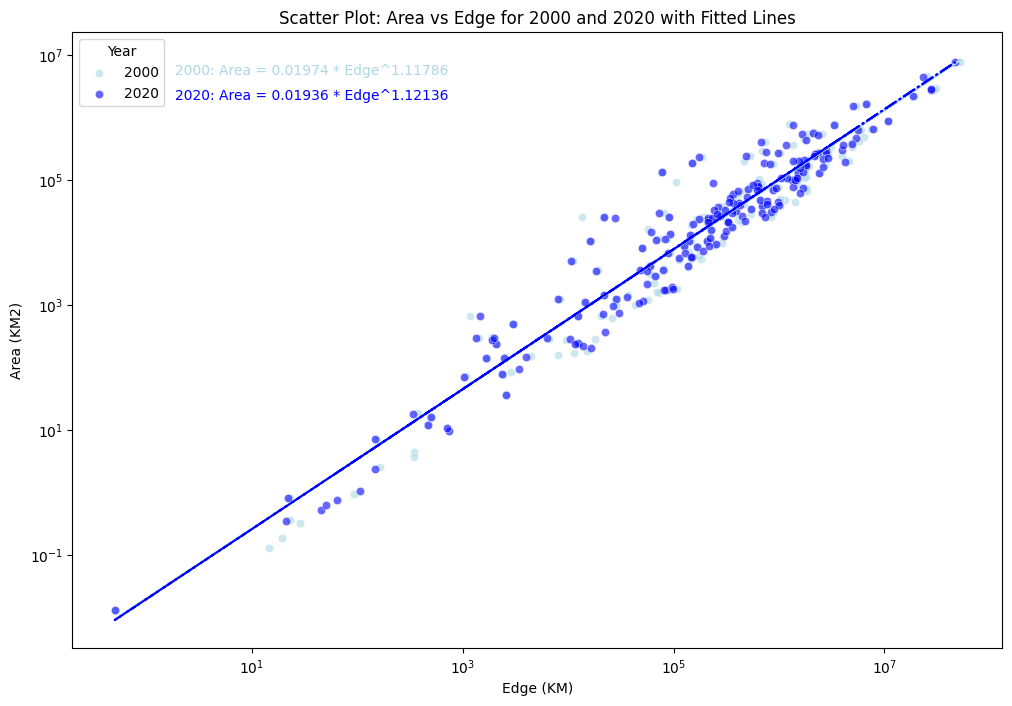

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df has columns 'forest edge 2000', 'forest edge 2020', 'Total Forest Area 2000', 'Total Forest Area 2020'

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot for the year 2000, using a light color (e.g., lightblue)
ax.scatter(df['forest edge 2000'], df['Total Forest Area 2000'], color='lightblue', label='2000', alpha=0.6, edgecolors='w', linewidth=0.5)

# Scatter plot for the year 2020, using a deeper color (e.g., blue)
ax.scatter(df['forest edge 2020'], df['Total Forest Area 2020'], color='blue', label='2020', alpha=0.6, edgecolors='w', linewidth=0.5)

# Fitting a linear line for 2000 data
coeffs_2000 = np.polyfit(np.log(df['forest edge 2000']), np.log(df['Total Forest Area 2000']), 1)
ax.plot(df['forest edge 2000'], np.exp(coeffs_2000[1]) * df['forest edge 2000'] ** coeffs_2000[0], color='lightblue', linestyle='-')

# Fitting a linear line for 2020 data
coeffs_2020 = np.polyfit(np.log(df['forest edge 2020']), np.log(df['Total Forest Area 2020']), 1)
ax.plot(df['forest edge 2020'], np.exp(coeffs_2020[1]) * df['forest edge 2020'] ** coeffs_2020[0], color='blue', linestyle='-.')

# Transform coefficients to power-law form
a_2000 = np.exp(coeffs_2000[1])
b_2000 = coeffs_2000[0]
a_2020 = np.exp(coeffs_2020[1])
b_2020 = coeffs_2020[0]

# Print the functions on the plot
ax.text(0.11, 0.93, f"2000: Area = {a_2000:.5f} * Edge^{b_2000:.5f}", transform=ax.transAxes, color='lightblue', fontsize=10)
ax.text(0.11, 0.89, f"2020: Area = {a_2020:.5f} * Edge^{b_2020:.5f}", transform=ax.transAxes, color='blue', fontsize=10)

# Labeling and titling
ax.set_xlabel('Edge (KM)')
ax.set_ylabel('Area (KM2)')
ax.set_title('Scatter Plot: Area vs Edge for 2000 and 2020 with Fitted Lines')
ax.legend(title='Year', scatterpoints=1)

# Setting the axes to logarithmic scale
ax.set_xscale('log')
ax.set_yscale('log')

# Show the plot
plt.show()

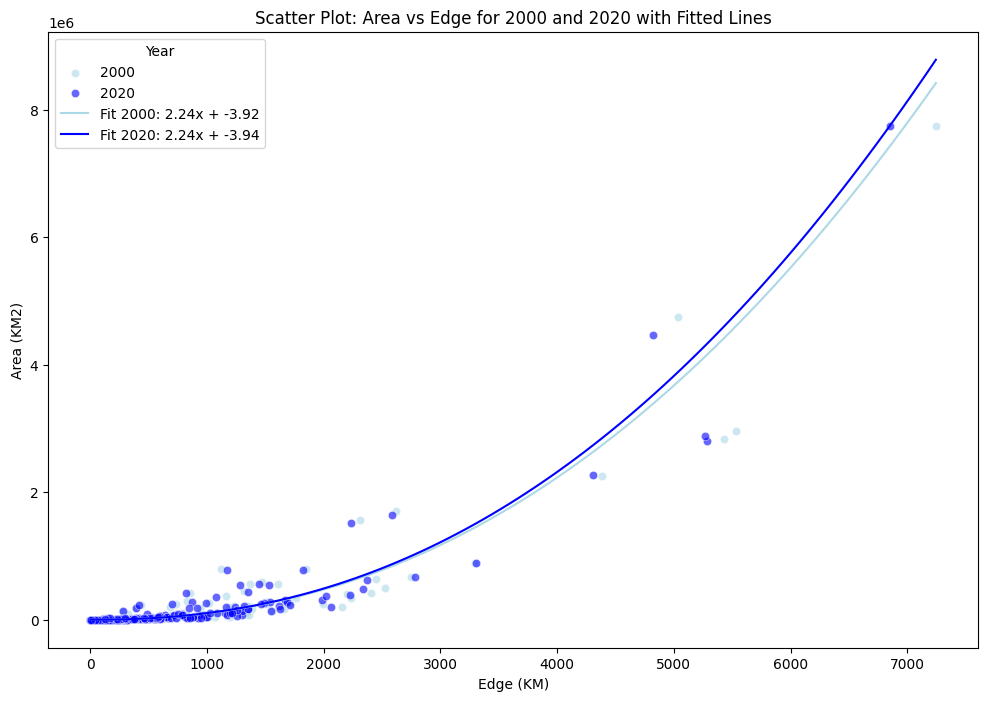

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df has columns 'forest edge 2000', 'forest edge 2020', 'Total Forest Area 2000', 'Total Forest Area 2020'

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot for the year 2000
ax.scatter(np.sqrt(df['forest edge 2000']), df['Total Forest Area 2000'], color='lightblue', label='2000', alpha=0.6, edgecolors='w', linewidth=0.5)

# Scatter plot for the year 2020
ax.scatter(np.sqrt(df['forest edge 2020']), df['Total Forest Area 2020'], color='blue', label='2020', alpha=0.6, edgecolors='w', linewidth=0.5)

# Calculating the line of best fit for 2000
coeffs_2000 = np.polyfit(np.log(np.sqrt(df['forest edge 2000'])), np.log(df['Total Forest Area 2000']), 1)
poly_2000 = np.poly1d(coeffs_2000)

# Calculating the line of best fit for 2020
coeffs_2020 = np.polyfit(np.log(np.sqrt(df['forest edge 2020'])), np.log(df['Total Forest Area 2020']), 1)
poly_2020 = np.poly1d(coeffs_2020)

# Creating x values for the line of best fit
x = np.linspace(min(np.sqrt(df['forest edge 2000']).min(), np.sqrt(df['forest edge 2020']).min()), 
                max(np.sqrt(df['forest edge 2000']).max(), np.sqrt(df['forest edge 2020']).max()), 100)

# Plotting the lines of best fit
ax.plot(x, np.exp(poly_2000(np.log(x))), color='lightblue', label=f'Fit 2000: {coeffs_2000[0]:.2f}x + {coeffs_2000[1]:.2f}')
ax.plot(x, np.exp(poly_2020(np.log(x))), color='blue', label=f'Fit 2020: {coeffs_2020[0]:.2f}x + {coeffs_2020[1]:.2f}')

# Labeling and titling
ax.set_xlabel('Edge (KM)')
ax.set_ylabel('Area (KM2)')
ax.set_title('Scatter Plot: Area vs Edge for 2000 and 2020 with Fitted Lines')
ax.legend(title='Year', scatterpoints=1)



# Show the plot
plt.show()

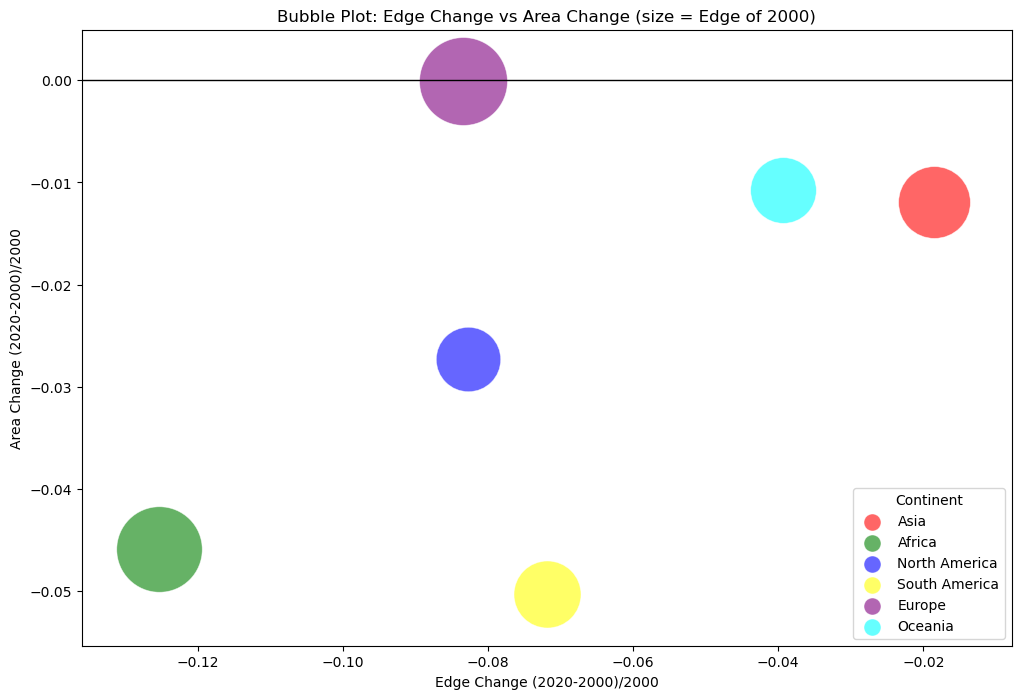

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 读取CSV数据
df = pd.read_csv(r'G:\Hangkai\Global forest edge\country_forest_area_output\aggregated_forest_info_by_continent.csv')

# 3. 给每个大陆设置不同的颜色
colors = {
    'Asia': 'red',
    'Africa': 'green',
    'North America': 'blue',
    'South America': 'yellow',
    'Europe': 'purple',
    'Oceania': 'cyan',
}

# 计算 Edge Change 和 Area Change
df['Edge Change'] = (df['forest edge 2020'].astype(float)-df['forest edge 2000'].astype(float))/(df['forest edge 2000'].astype(float))
df['Area Change'] = (df['Total Forest Area 2020'].astype(float)-df['Total Forest Area 2000'].astype(float))/(df['Total Forest Area 2000'].astype(float))

# 设定期望的气泡尺寸范围
min_size = 10
max_size = 4000

# 获取数据的最小和最大值
min_area = df['forest edge 2000'].min()
max_area = df['forest edge 2000'].max()

# 计算映射后的尺寸
bubble_sizes = ((df['forest edge 2000'] - min_area) / (max_area - min_area) * (max_size - min_size) + min_size)

fig, ax = plt.subplots(figsize=(12, 8))

# 绘制气泡图
for continent, color in colors.items():
    subset = df[df['continent'] == continent]
    subset_bubble_sizes = bubble_sizes[subset.index] # 选择正确的子集尺寸
    ax.scatter(subset['Edge Change'], subset['Area Change'], s=subset_bubble_sizes, color=color, alpha=0.6, edgecolors="w", linewidth=0.5)
    ax.scatter([], [], s=150, color=color, label=continent, alpha=0.6, edgecolors="w", linewidth=0.5)

# 设置轴界限
padding_x = 0.1 * (df['Edge Change'].max() - df['Edge Change'].min())
padding_y = 0.1 * (df['Area Change'].max() - df['Area Change'].min())
ax.set_xlim(df['Edge Change'].min() - padding_x, df['Edge Change'].max() + padding_x)
ax.set_ylim(df['Area Change'].min() - padding_y, df['Area Change'].max() + padding_y)

ax.set_xlabel('Edge Change (2020-2000)/2000')
ax.set_ylabel('Area Change (2020-2000)/2000')
ax.legend(title='Continent', scatterpoints=1)
ax.set_title('Bubble Plot: Edge Change vs Area Change (size = Edge of 2000)')
ax.axvline(0, color='black', linestyle='-', linewidth=1)  # x=0 line
ax.axhline(0, color='black', linestyle='-', linewidth=1)  # y=0 line

plt.show()

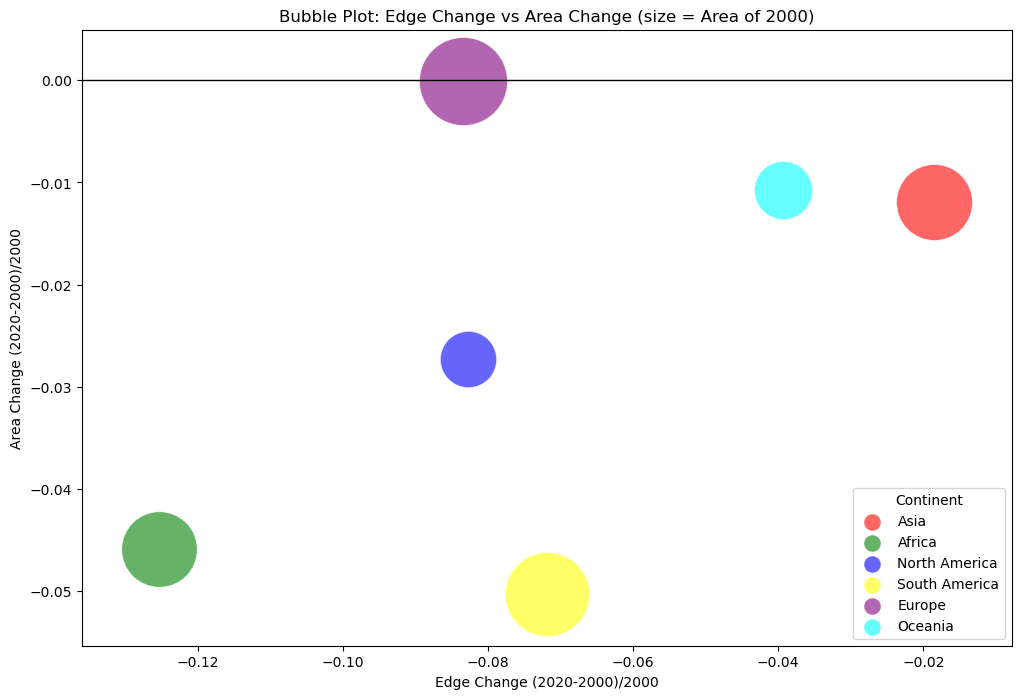

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 读取CSV数据
df = pd.read_csv(r'G:\Hangkai\Global forest edge\country_forest_area_output\aggregated_forest_info_by_continent.csv')

# 3. 给每个大陆设置不同的颜色
colors = {
    'Asia': 'red',
    'Africa': 'green',
    'North America': 'blue',
    'South America': 'yellow',
    'Europe': 'purple',
    'Oceania': 'cyan',
}

# 计算 Edge Change 和 Area Change
df['Edge Change'] = (df['forest edge 2020'].astype(float)-df['forest edge 2000'].astype(float))/(df['forest edge 2000'].astype(float))
df['Area Change'] = (df['Total Forest Area 2020'].astype(float)-df['Total Forest Area 2000'].astype(float))/(df['Total Forest Area 2000'].astype(float))

# 设定期望的气泡尺寸范围
min_size = 10
max_size = 4000

# 获取数据的最小和最大值
min_area = df['Total Forest Area 2000'].min()
max_area = df['Total Forest Area 2000'].max()

# 计算映射后的尺寸
bubble_sizes = ((df['Total Forest Area 2000'] - min_area) / (max_area - min_area) * (max_size - min_size) + min_size)

fig, ax = plt.subplots(figsize=(12, 8))

# 绘制气泡图
for continent, color in colors.items():
    subset = df[df['continent'] == continent]
    subset_bubble_sizes = bubble_sizes[subset.index] # 选择正确的子集尺寸
    ax.scatter(subset['Edge Change'], subset['Area Change'], s=subset_bubble_sizes, color=color, alpha=0.6, edgecolors="w", linewidth=0.5)
    ax.scatter([], [], s=150, color=color, label=continent, alpha=0.6, edgecolors="w", linewidth=0.5)

# 设置轴界限
padding_x = 0.1 * (df['Edge Change'].max() - df['Edge Change'].min())
padding_y = 0.1 * (df['Area Change'].max() - df['Area Change'].min())
ax.set_xlim(df['Edge Change'].min() - padding_x, df['Edge Change'].max() + padding_x)
ax.set_ylim(df['Area Change'].min() - padding_y, df['Area Change'].max() + padding_y)

ax.set_xlabel('Edge Change (2020-2000)/2000')
ax.set_ylabel('Area Change (2020-2000)/2000')
ax.legend(title='Continent', scatterpoints=1)
ax.set_title('Bubble Plot: Edge Change vs Area Change (size = Area of 2000)')
ax.axvline(0, color='black', linestyle='-', linewidth=1)  # x=0 line
ax.axhline(0, color='black', linestyle='-', linewidth=1)  # y=0 line

plt.show()